# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [10]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [11]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [43]:
#app_train['AMT_ANNUITY'].describe()

# 1: 計算 AMT_ANNUITY 的 q0 - q100



qall = range(0,101)
q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in qall]
#print(q_all)

pd.DataFrame({'q': list(range(101)),'value': q_all})



,q,value
0,0,6182.91
1,1,6182.91
2,2,6182.91
3,3,6182.91
4,4,6182.91
5,5,6182.91
6,6,6182.91
7,7,6182.91
8,8,6182.91
9,9,6182.91


In [49]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


#q_50 = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in 50]
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].isnull()] = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 50)
#app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50


print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 12


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

== Original data range ==
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


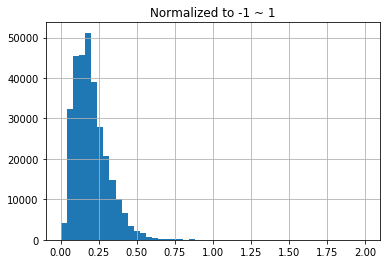

== Normalized data range ==


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [52]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())
value = app_train['AMT_ANNUITY'].values

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    app_train['AMT_CREDIT_Norm2'] = (( value - min(value) ) / ( max(value) - min(value) - 0.5 )*2)
    app_train['AMT_CREDIT_Norm2'].hist(bins = 50)
    plt.title("Normalized to -1 ~ 1")
    plt.show()
    
    return x



app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

In [54]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
from scipy.stats import mode
value_most = mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
ModeResult(mode=array([9000.]), count=array([6385]))
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0
